# Base Model

## Data Collection

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
Breast_cancer = pd.read_csv(r"C:\Users\amits\OneDrive\Documents\project699\breast-cancer699.csv")
Breast_cancer

id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
..       ...              ...              ...               ...   
694   776715                3                1                 1   
695   841769                2                1                 1   
696   888820                5               10                10   
697   897471                4                8                 6   
698   897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                    1                2             1                3   
1                    5                7            10                3   
2                    1                2             2                3   
3                    1                3             4                3   
4                    3                2             1                3   
..                 ...              ...           ...              ...   
694                  1                3             2                1   
695                  1                2             1                1   
696                  3                7             3                8   
697                  4                3             4               10   
698                  5                4             5               10   

     normal_nucleoli  mitoses  class  
0                  1        1      2  
1                  2        1      2  
2                  1        1      2  
3                  7        1      2  
4                  1        1      2  
..               ...      ...    ...  
694                1        1      2  
695                1        1      2  
696               10        2      4  
697                6        1      4  
698                4        1      4  

[699 rows x 11 columns]

## Null Check 

In [44]:
Breast_cancer.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

## ID Remove

In [45]:
Breast_cancer = Breast_cancer.drop(columns=['id'])


## Datatype Check and convert

In [46]:
Breast_cancer.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [47]:
Breast_cancer['bare_nucleoli'] = Breast_cancer['bare_nucleoli'].astype('category')


In [48]:
Breast_cancer.dtypes

clump_thickness         int64
size_uniformity         int64
shape_uniformity        int64
marginal_adhesion       int64
epithelial_size         int64
bare_nucleoli        category
bland_chromatin         int64
normal_nucleoli         int64
mitoses                 int64
class                   int64
dtype: object

## Label encoding of class

In [49]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'class' column
Breast_cancer['class'] = label_encoder.fit_transform(Breast_cancer['class'])


In [50]:
Breast_cancer

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  \
0                  2             1                3                1        1   
1                  7            10                3                2        1   
2                  2             2                3                1        1   
3                  3             4                3                7        1   
4                  2             1                3                1        1   
..               ...           ...              ...              ...      ...   
694                3             2                1                1        1   
695                2             1                1                1        1   
696                7             3                8               10        2   
697                3             4               10                6        1   
698                4             5               10                4        1   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
694      0  
695      0  
696      1  
697      1  
698      1  

[699 rows x 10 columns]

In [51]:
# Check for string values like '?'
print(Breast_cancer.isin(['?']).sum())

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64


In [52]:
Breast_cancer['bare_nucleoli'] = Breast_cancer['bare_nucleoli'].replace('?', np.nan)
Breast_cancer.isnull().sum()

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [53]:
Breast_cancer=Breast_cancer.dropna()
Breast_cancer.isnull().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

## Kfold 

In [54]:
# Features and target
I = Breast_cancer.drop('class', axis=1)  # Replace 'target_column' with your actual target column name
J = Breast_cancer['class']

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(I), 1):
    I_train, I_test = I.iloc[train_index], I.iloc[test_index]
    J_train, J_test = J.iloc[train_index], J.iloc[test_index]

    # Initialize model
    model = RandomForestClassifier(random_state=42)
    
    # Fit model
    model.fit(I_train, J_train)
    
    # Predict
    J_pred = model.predict(I_test)
    
    # Evaluate
    accuracy = accuracy_score(J_test, J_pred)
    fold_accuracies.append(accuracy)
    
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Average accuracy across all folds
print(f"\nAverage Accuracy: {np.mean(fold_accuracies):.4f}")


Fold 1: Accuracy = 0.9855
Fold 2: Accuracy = 0.9710
Fold 3: Accuracy = 0.9565
Fold 4: Accuracy = 0.9853
Fold 5: Accuracy = 0.9853
Fold 6: Accuracy = 0.9559
Fold 7: Accuracy = 0.9559
Fold 8: Accuracy = 1.0000
Fold 9: Accuracy = 0.9559
Fold 10: Accuracy = 0.9706

Average Accuracy: 0.9722


## Classification

In [55]:
# Encode categorical variables to numeric (one-hot encoding)
I_encoded = pd.get_dummies(I)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    # 'Rotation Forest': CustomRotationForest(),  # Placeholder
}

# KFold cross-validation setup (use your existing 'kf' object)
# Example: kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate each classifier
for name, clf in classifiers.items():
    fold_accuracies = []
    print(f"\n{'='*50}\nClassifier: {name}\n{'='*50}")
    
    for fold, (train_index, test_index) in enumerate(kf.split(I_encoded), 1):
        I_train, I_test = I_encoded.iloc[train_index], I_encoded.iloc[test_index]
        J_train, J_test = J.iloc[train_index], J.iloc[test_index]
        
        clf.fit(I_train, J_train)
        J_pred = clf.predict(I_test)
        accuracy = accuracy_score(J_test, J_pred)
        fold_accuracies.append(accuracy)
        
        print(f"Fold {fold:2}: Accuracy = {accuracy:.4f}")
    
    print(f"\nAverage Accuracy for {name}: {np.mean(fold_accuracies):.4f}")



Classifier: Logistic Regression
Fold  1: Accuracy = 1.0000
Fold  2: Accuracy = 0.9420
Fold  3: Accuracy = 0.9565
Fold  4: Accuracy = 0.9853
Fold  5: Accuracy = 0.9559
Fold  6: Accuracy = 0.9559
Fold  7: Accuracy = 0.9265
Fold  8: Accuracy = 1.0000
Fold  9: Accuracy = 0.9706
Fold 10: Accuracy = 0.9559

Average Accuracy for Logistic Regression: 0.9649

Classifier: K-Nearest Neighbors
Fold  1: Accuracy = 0.9710
Fold  2: Accuracy = 0.9130
Fold  3: Accuracy = 0.9710
Fold  4: Accuracy = 1.0000
Fold  5: Accuracy = 0.9559
Fold  6: Accuracy = 0.9559
Fold  7: Accuracy = 0.9412
Fold  8: Accuracy = 0.9853
Fold  9: Accuracy = 0.9559
Fold 10: Accuracy = 0.9706

Average Accuracy for K-Nearest Neighbors: 0.9620

Classifier: Support Vector Machine
Fold  1: Accuracy = 1.0000
Fold  2: Accuracy = 0.9420
Fold  3: Accuracy = 0.9710
Fold  4: Accuracy = 0.9853
Fold  5: Accuracy = 0.9412
Fold  6: Accuracy = 0.9559
Fold  7: Accuracy = 0.9559
Fold  8: Accuracy = 0.9853
Fold  9: Accuracy = 0.9559
Fold 10: Accura

In [56]:
Breast_cancer

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  \
0                  2             1                3                1        1   
1                  7            10                3                2        1   
2                  2             2                3                1        1   
3                  3             4                3                7        1   
4                  2             1                3                1        1   
..               ...           ...              ...              ...      ...   
694                3             2                1                1        1   
695                2             1                1                1        1   
696                7             3                8               10        2   
697                3             4               10                6        1   
698                4             5               10                4        1   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
694      0  
695      0  
696      1  
697      1  
698      1  

[683 rows x 10 columns]

# Propose Model

## Data colaction

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [58]:
df_cancer2 = pd.read_csv(r"C:\Users\amits\OneDrive\Documents\project699\breast-cancer699.csv")

In [59]:
df_cancer2.head()

id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2

In [60]:
df_cancer2.tail()

id  clump_thickness  size_uniformity  shape_uniformity  \
694  776715                3                1                 1   
695  841769                2                1                 1   
696  888820                5               10                10   
697  897471                4                8                 6   
698  897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
694                  1                3             2                1   
695                  1                2             1                1   
696                  3                7             3                8   
697                  4                3             4               10   
698                  5                4             5               10   

     normal_nucleoli  mitoses  class  
694                1        1      2  
695                1        1      2  
696               10        2      4  
697                6        1      4  
698                4        1      4

In [61]:
df_cancer2.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [62]:
df_cancer2.duplicated().sum()

8

In [63]:
df_cancer2 = df_cancer2.drop_duplicates()

In [64]:
df_cancer2.isin(['?']).sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [65]:
# # Replace '?' with NaN
# df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].replace('?', np.nan)

# # Convert to numeric (this turns valid strings into numbers, and '?' is now NaN)
# df_cancer2['bare_nucleoli'] = pd.to_numeric(df_cancer2['bare_nucleoli'])

# # Fill NaNs with mode
# mode_value = df_cancer2['bare_nucleoli'].mode()[0]
# df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].fillna(mode_value)

# # Make sure it's an integer if needed
# df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].astype(int)

In [66]:
df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].replace('?', np.nan)
df_cancer2.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [67]:
df_cancer2=df_cancer2.dropna()
df_cancer2.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

## Id remove

In [68]:
df_cancer2 = df_cancer2.drop(columns=['id'])

# Outlier detaction

# Outlier remove

In [69]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest



# Convert categorical columns to numerical
for col in df_cancer2.select_dtypes(include=['object', 'category']).columns:
    df_cancer2[col] = pd.factorize(df_cancer2[col])[0]  

# Define feature matrix (X)
X = df_cancer2.to_numpy()  # Convert DataFrame to NumPy array

# Initialize and fit Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X)

# Predict outliers (-1 = outlier, 1 = inlier)
y_pred = iforest.predict(X)

# Remove outliers from dataset
df_cancer = df_cancer2.loc[y_pred == 1].reset_index(drop=True)


# Print summary
print(f"✅ Outlier removal complete!")
print(f"Original dataset size: {df_cancer2.shape[0]} rows")
print(f"Cleaned dataset size: {df_cancer.shape[0]} rows")
print(f"Outliers removed: {df_cancer2.shape[0] - df_cancer.shape[0]}")


✅ Outlier removal complete!
Original dataset size: 675 rows
Cleaned dataset size: 607 rows
Outliers removed: 68


In [70]:
df_cancer

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  4                1                 1                  3   
4                  8               10                10                  8   
..               ...              ...               ...                ...   
602                3                1                 1                  1   
603                2                1                 1                  1   
604                5               10                10                  3   
605                4                8                 6                  4   
606                4                8                 8                  5   

     epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  \
0                  2              0                3                1   
1                  7              1                3                2   
2                  2              2                3                1   
3                  2              0                3                1   
4                  7              1                9                7   
..               ...            ...              ...              ...   
602                3              2                1                1   
603                2              0                1                1   
604                7              4                8               10   
605                3              3               10                6   
606                4              7               10                4   

     mitoses  class  
0          1      2  
1          1      2  
2          1      2  
3          1      2  
4          1      4  
..       ...    ...  
602        1      2  
603        1      2  
604        2      4  
605        1      4  
606        1      4  

[607 rows x 10 columns]

# Encoding

In [71]:
en_data_OHE = df_cancer[["class"]]
pd.get_dummies(en_data_OHE)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data_OHE).toarray()
df_cancer=df_cancer.copy()
df_cancer[["class"]]=pd.DataFrame(ar,columns=["class"])

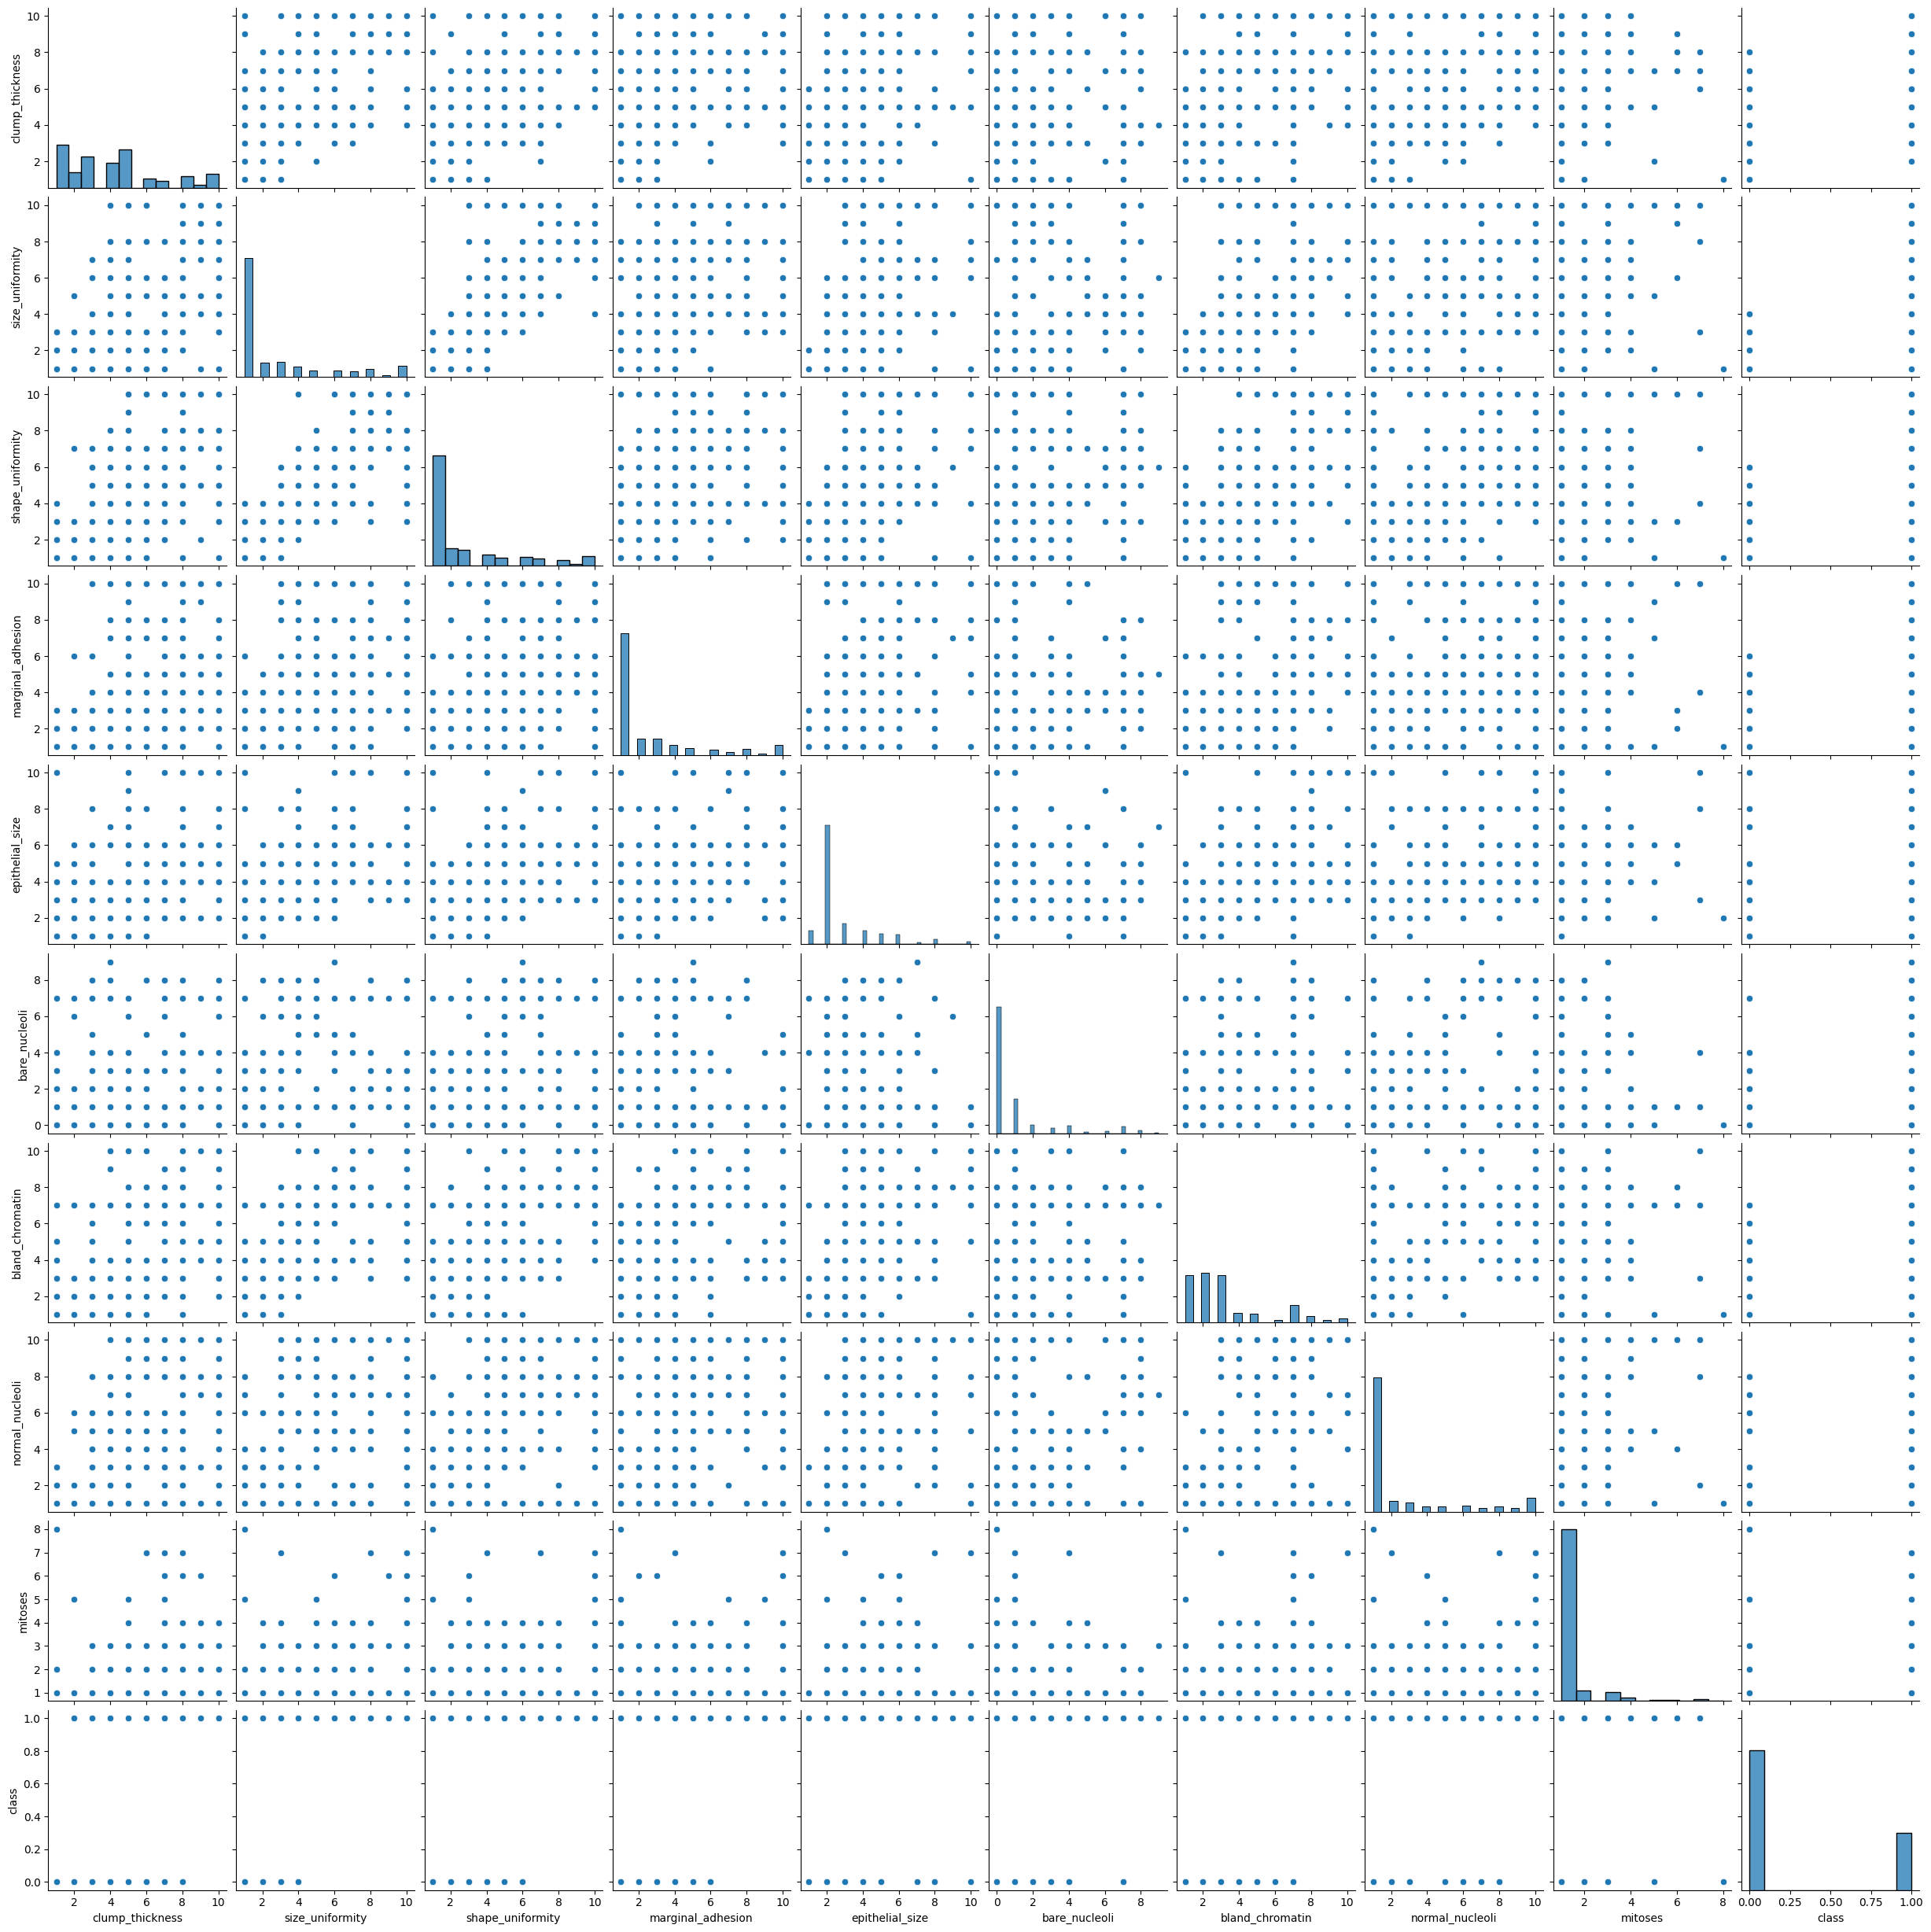

In [72]:
sns.pairplot(df_cancer , vars =['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'])

In [73]:
# sns.pairplot(df_cancer ,hue ='diagnosis', vars =['Radius_mean','Texture_mean', 'perimeter_mean', 'area_mean',
#  'smoothness_mean', 'compactness_mean' ,'concavity_mean']) 

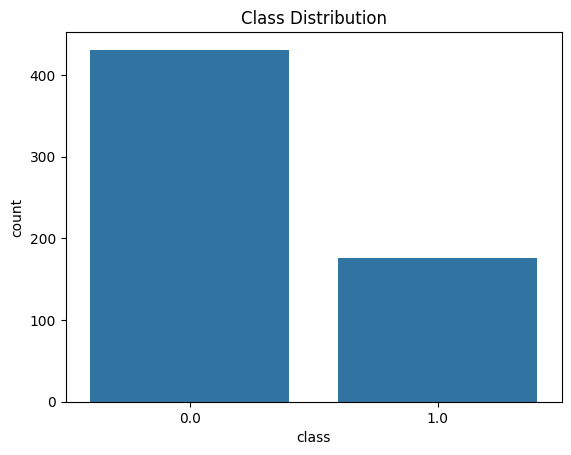

In [74]:
sns.countplot(x=df_cancer['class'])
plt.title('Class Distribution')
plt.show()

In [75]:
# sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data =df_cancer)

<Axes: >

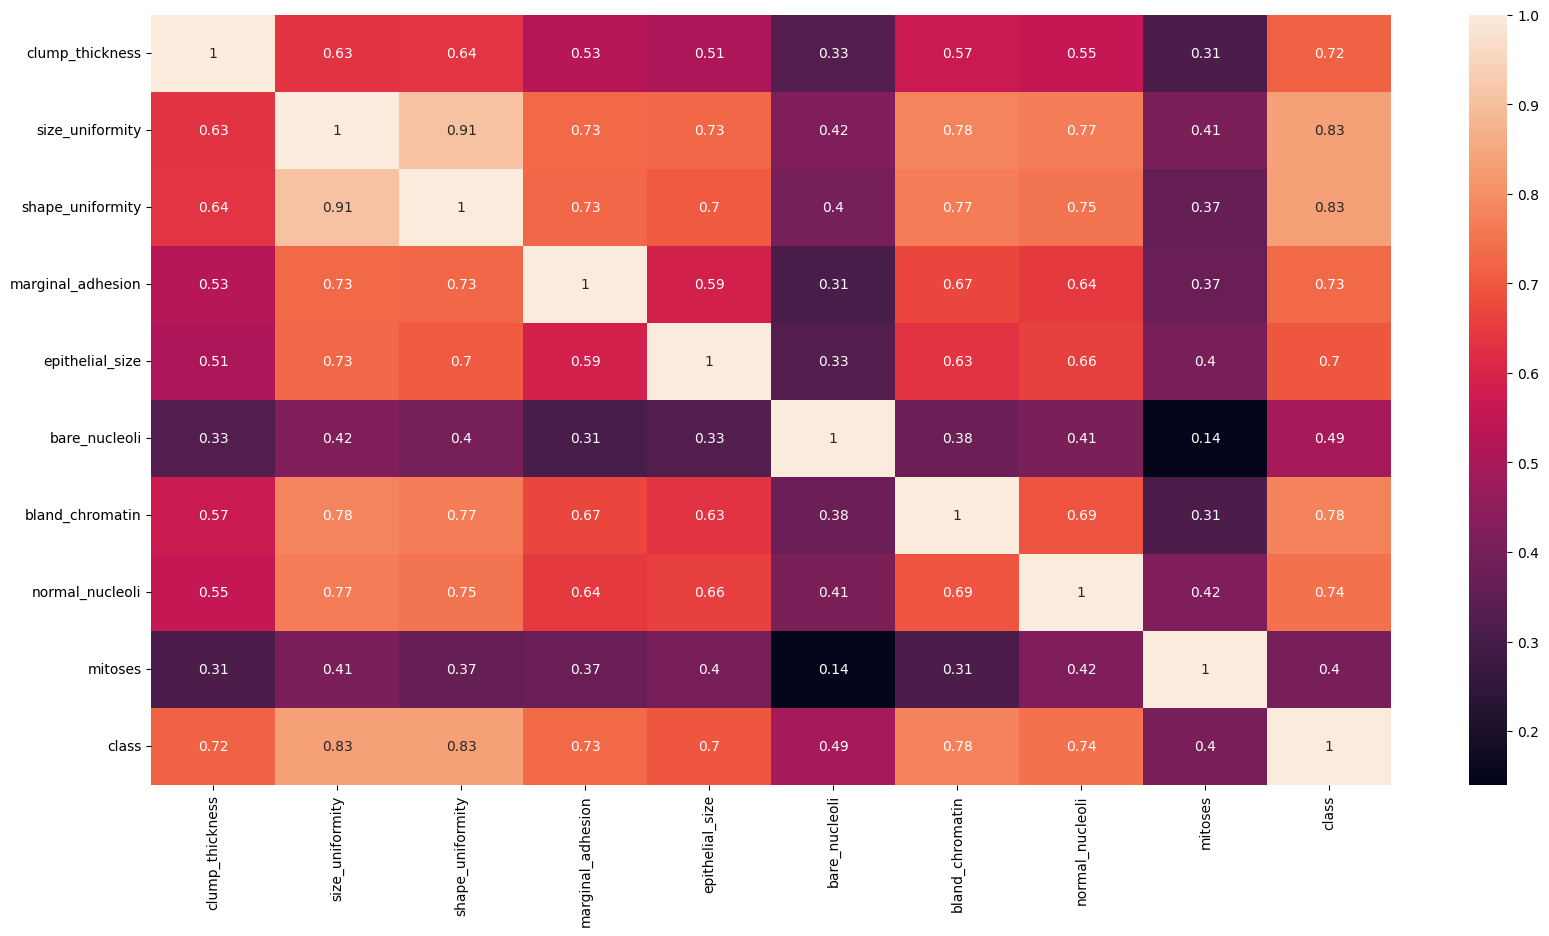

In [76]:
plt.figure(figsize =(20,10))
sns.heatmap(df_cancer.corr(), annot =True)

# Geting X and y

In [77]:
# Defining the X and y
X = df_cancer.drop('class',axis=1)
y = df_cancer['class']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Feature Selection

In [78]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

             Feature  Importance
1    size_uniformity    0.341681
2   shape_uniformity    0.244163
6    bland_chromatin    0.124831
7    normal_nucleoli    0.101201
5      bare_nucleoli    0.069774
4    epithelial_size    0.051694
0    clump_thickness    0.041777
3  marginal_adhesion    0.021095
8            mitoses    0.003785


In [79]:
selected_features = feature_importance_df["Feature"].head(5).values
X_selected = X[selected_features]

In [80]:
# Splitting the data into training and testing sets
# train test split
# Splitting the data into training and testing sets
# train test split

#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train0, X_test, y_train0, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train0, y_train0)

In [81]:
# Checking the train distribution of dependent variable
y_train.value_counts()

class
0.0    346
1.0    346
Name: count, dtype: int64

In [82]:
# Create a StandardScaler object to standardize the data
scaler = StandardScaler()

# Apply the StandardScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

# Trainig Model

In [83]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")
    
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score


In [84]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

In [85]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Train ROC AUC: 0.9682080924855492
Test ROC AUC: 0.9511923688394277


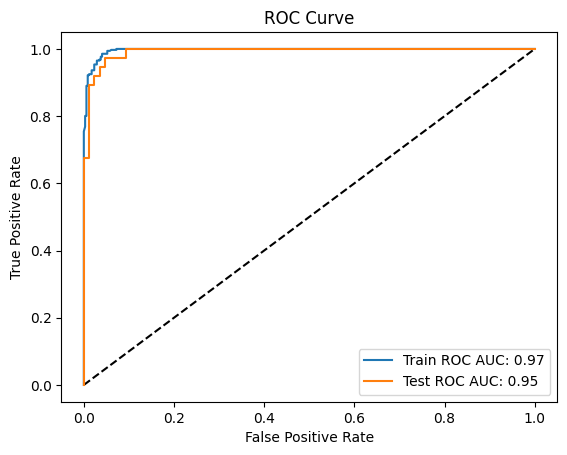


Confusion Matrix:


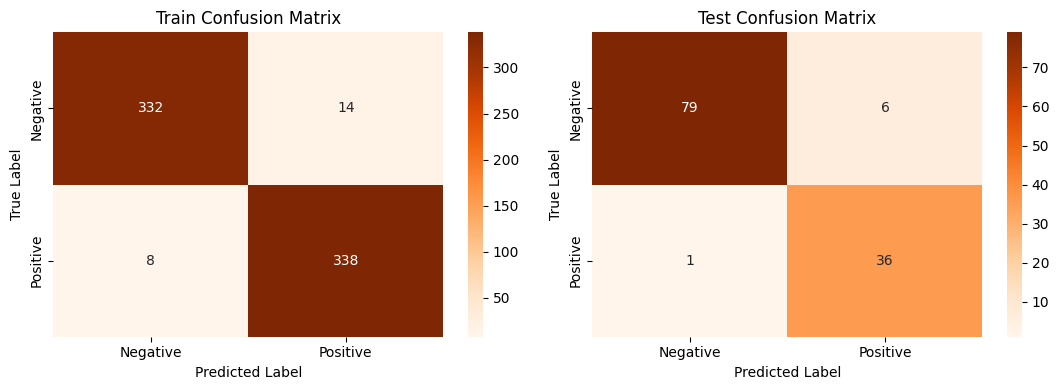


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.976471 | 0.959538 |   0.96793  | 346        |
| 1.0          |    0.960227 | 0.976879 |   0.968481 | 346        |
| accuracy     |    0.968208 | 0.968208 |   0.968208 |   0.968208 |
| macro avg    |    0.968349 | 0.968208 |   0.968206 | 692        |
| weighted avg |    0.968349 | 0.968208 |   0.968206 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.9875   | 0.929412 |   0.957576 |  85        |
| 1.0          |    0.857143 | 0.972973 |   0.911392 |  37        |
| accuracy     |    0.942623 | 0.942623 |   0.942623 |   0.942623 |
| macro avg    |    0.922321 | 0.951192 |   0.934484 | 122        |
| weighted avg |    0.947965 | 0.942623 |   0.943569 | 12

In [86]:
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [87]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.968349
Precision Test              0.947965
Recall Train                0.968208
Recall Test                 0.942623
Accuracy Train              0.968208
Accuracy Test               0.942623
ROC-AUC Train               0.968208
ROC-AUC Test                0.951192
F1 macro Train              0.968206
F1 macro Test               0.943569

# Using k-fold

In [88]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [89]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.9653179190751445
Test ROC AUC: 0.9511923688394277


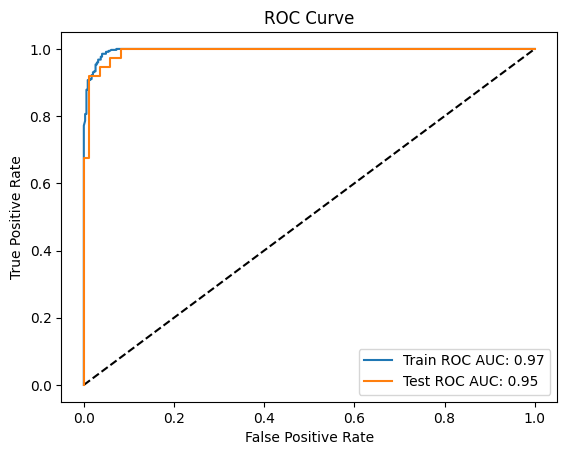


Confusion Matrix:


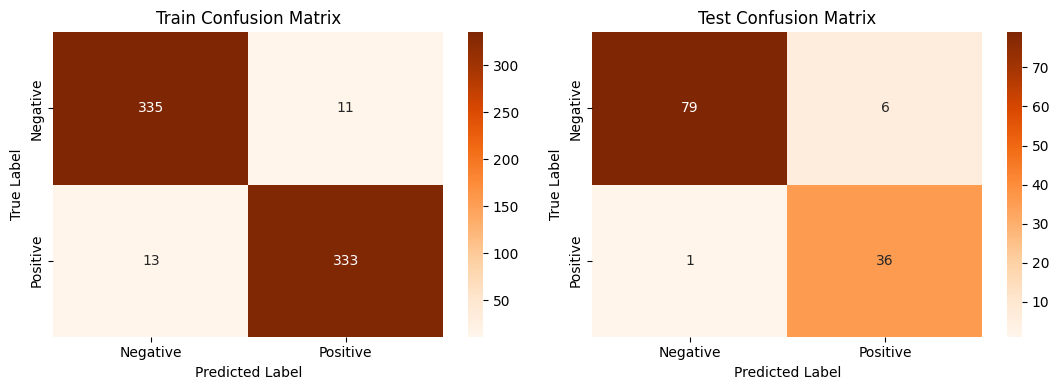


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.962644 | 0.968208 |   0.965418 | 346        |
| 1.0          |    0.968023 | 0.962428 |   0.965217 | 346        |
| accuracy     |    0.965318 | 0.965318 |   0.965318 |   0.965318 |
| macro avg    |    0.965333 | 0.965318 |   0.965318 | 692        |
| weighted avg |    0.965333 | 0.965318 |   0.965318 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.9875   | 0.929412 |   0.957576 |  85        |
| 1.0          |    0.857143 | 0.972973 |   0.911392 |  37        |
| accuracy     |    0.942623 | 0.942623 |   0.942623 |   0.942623 |
| macro avg    |    0.922321 | 0.951192 |   0.934484 | 122        |
| weighted avg |    0.947965 | 0.942623 |   0.943569 | 12

In [90]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [91]:
score['Logistic regression tuned'] = lr_score2

In [92]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned
Precision Train             0.968349                   0.965333
Precision Test              0.947965                   0.947965
Recall Train                0.968208                   0.965318
Recall Test                 0.942623                   0.942623
Accuracy Train              0.968208                   0.965318
Accuracy Test               0.942623                   0.942623
ROC-AUC Train               0.968208                   0.965318
ROC-AUC Test                0.951192                   0.951192
F1 macro Train              0.968206                   0.965318
F1 macro Test               0.943569                   0.943569

In [93]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9971098265895955
Test ROC AUC: 0.957074721780604


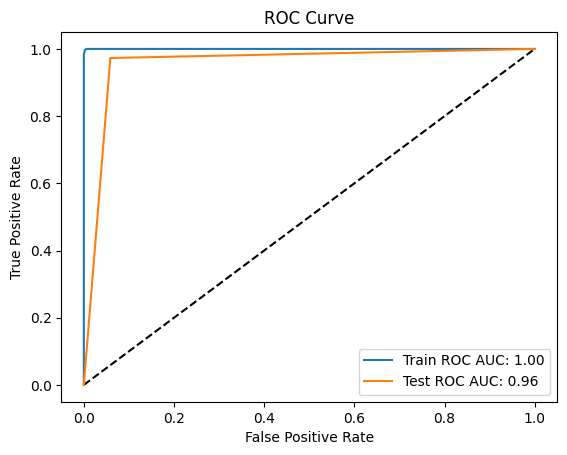


Confusion Matrix:


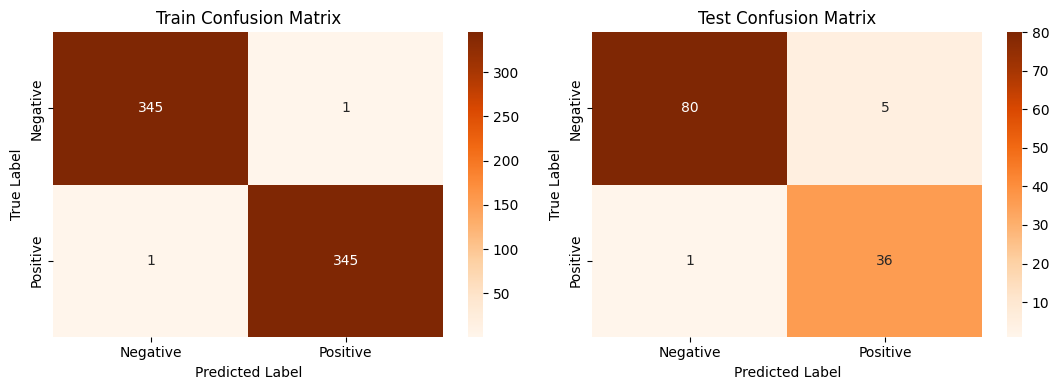


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |     0.99711 |  0.99711 |    0.99711 | 346       |
| 1.0          |     0.99711 |  0.99711 |    0.99711 | 346       |
| accuracy     |     0.99711 |  0.99711 |    0.99711 |   0.99711 |
| macro avg    |     0.99711 |  0.99711 |    0.99711 | 692       |
| weighted avg |     0.99711 |  0.99711 |    0.99711 | 692       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.987654 | 0.941176 |   0.963855 |  85       |
| 1.0          |    0.878049 | 0.972973 |   0.923077 |  37       |
| accuracy     |    0.95082  | 0.95082  |   0.95082  |   0.95082 |
| macro avg    |    0.932852 | 0.957075 |   0.943466 | 122       |
| weighted avg |    0.954413 | 0.95082  |   0.951488 | 122       |


In [94]:
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [95]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.968349                   0.965333       0.997110
Precision Test              0.947965                   0.947965       0.954413
Recall Train                0.968208                   0.965318       0.997110
Recall Test                 0.942623                   0.942623       0.950820
Accuracy Train              0.968208                   0.965318       0.997110
Accuracy Test               0.942623                   0.942623       0.950820
ROC-AUC Train               0.968208                   0.965318       0.997110
ROC-AUC Test                0.951192                   0.951192       0.957075
F1 macro Train              0.968206                   0.965318       0.997110
F1 macro Test               0.943569                   0.943569       0.951488

In [96]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [97]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.9638728323699421
Test ROC AUC: 0.9394276629570747


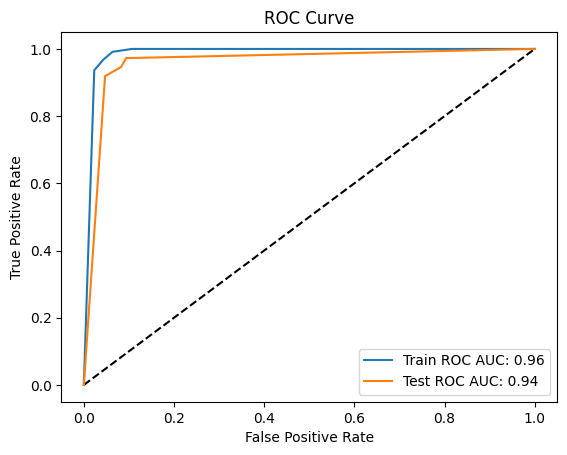


Confusion Matrix:


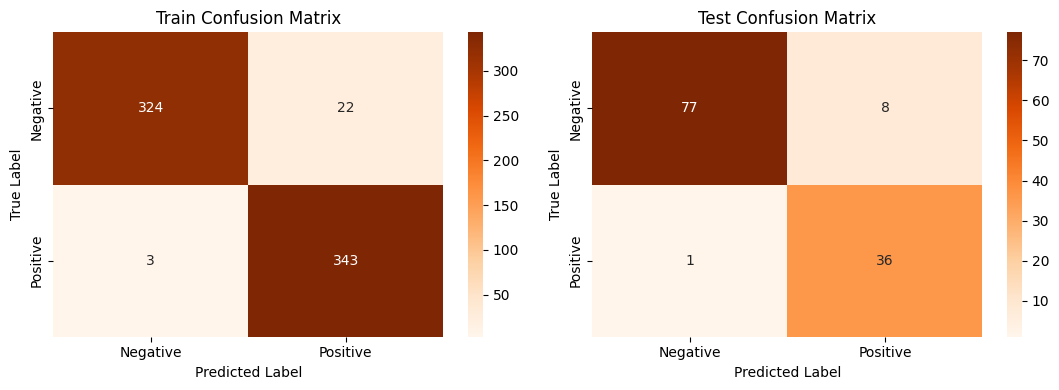


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.990826 | 0.936416 |   0.962853 | 346        |
| 1.0          |    0.939726 | 0.991329 |   0.964838 | 346        |
| accuracy     |    0.963873 | 0.963873 |   0.963873 |   0.963873 |
| macro avg    |    0.965276 | 0.963873 |   0.963846 | 692        |
| weighted avg |    0.965276 | 0.963873 |   0.963846 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.987179 | 0.905882 |   0.944785 |  85       |
| 1.0          |    0.818182 | 0.972973 |   0.888889 |  37       |
| accuracy     |    0.92623  | 0.92623  |   0.92623  |   0.92623 |
| macro avg    |    0.902681 | 0.939428 |   0.916837 | 122       |
| weighted avg |    0.935926 | 0.92623  |   0.927833 | 122     

In [98]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_train, X_test, y_train, y_test)
     

In [99]:
score['Decision Tree tuned'] = dt2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  
Precision Train       0.997110             0.965276  
Precision Test        0.954413             0.935926  
Recall Train          0.997110             0.963873  
Recall Test           0.950820             0.926230  
Accuracy Train        0.997110             0.963873  
Accuracy Test         0.950820             0.926230  
ROC-AUC Train         0.997110             0.963873  
ROC-AUC Test          0.957075             0.939428  
F1 macro Train        0.997110             0.963846  
F1 macro Test         0.951488             0.927833

In [100]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9971098265895955
Test ROC AUC: 0.957074721780604


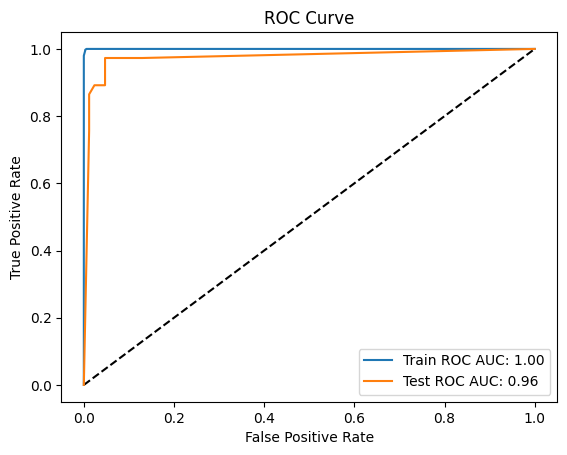


Confusion Matrix:


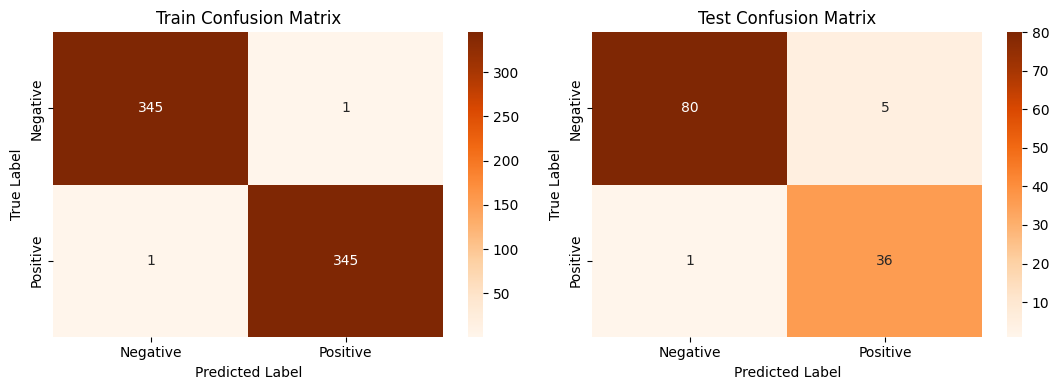


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |     0.99711 |  0.99711 |    0.99711 | 346       |
| 1.0          |     0.99711 |  0.99711 |    0.99711 | 346       |
| accuracy     |     0.99711 |  0.99711 |    0.99711 |   0.99711 |
| macro avg    |     0.99711 |  0.99711 |    0.99711 | 692       |
| weighted avg |     0.99711 |  0.99711 |    0.99711 | 692       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.987654 | 0.941176 |   0.963855 |  85       |
| 1.0          |    0.878049 | 0.972973 |   0.923077 |  37       |
| accuracy     |    0.95082  | 0.95082  |   0.95082  |   0.95082 |
| macro avg    |    0.932852 | 0.957075 |   0.943466 | 122       |
| weighted avg |    0.954413 | 0.95082  |   0.951488 | 122       |


In [101]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [102]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       0.997110             0.965276       0.997110  
Precision Test        0.954413             0.935926       0.954413  
Recall Train          0.997110             0.963873       0.997110  
Recall Test           0.950820             0.926230       0.950820  
Accuracy Train        0.997110             0.963873       0.997110  
Accuracy Test         0.950820             0.926230       0.950820  
ROC-AUC Train         0.997110             0.963873       0.997110  
ROC-AUC Test          0.957075             0.939428       0.957075  
F1 macro Train        0.997110             0.963846       0.997110  
F1 macro Test         0.951488             0.927833       0.951488

In [103]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}


In [104]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9927745664739884
Test ROC AUC: 0.9629570747217806


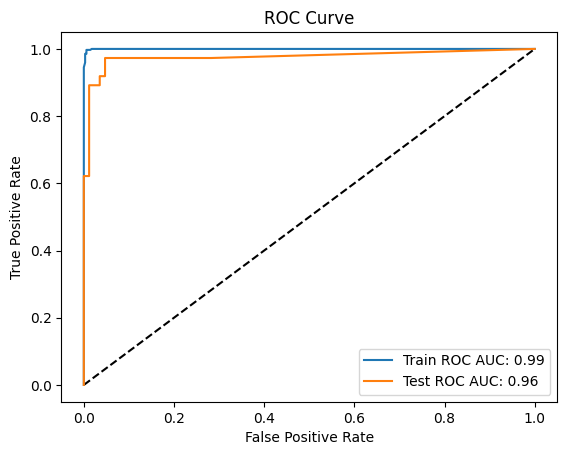


Confusion Matrix:


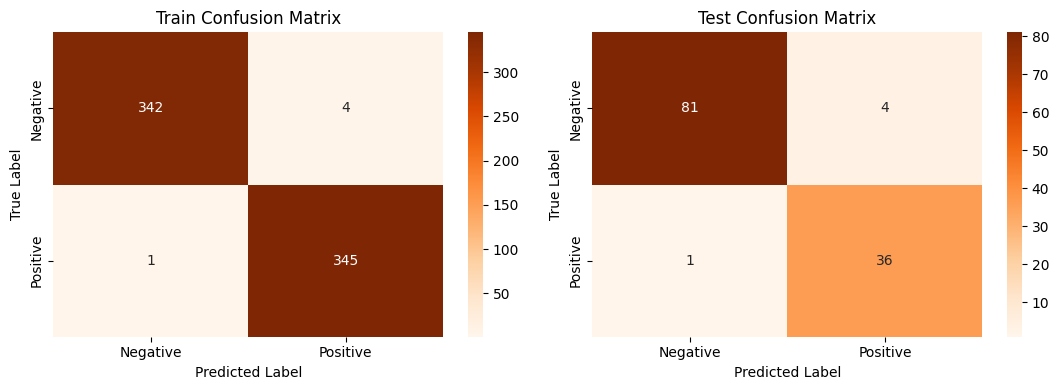


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.997085 | 0.988439 |   0.992743 | 346        |
| 1.0          |    0.988539 | 0.99711  |   0.992806 | 346        |
| accuracy     |    0.992775 | 0.992775 |   0.992775 |   0.992775 |
| macro avg    |    0.992812 | 0.992775 |   0.992774 | 692        |
| weighted avg |    0.992812 | 0.992775 |   0.992774 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.987805 | 0.952941 |   0.97006  |  85        |
| 1.0          |    0.9      | 0.972973 |   0.935065 |  37        |
| accuracy     |    0.959016 | 0.959016 |   0.959016 |   0.959016 |
| macro avg    |    0.943902 | 0.962957 |   0.952562 | 122        |
| weighted avg |    0.961176 | 0.959016 |   0.959447 | 12

In [105]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_train, X_test, y_train, y_test)

In [106]:
score['Random Forest tuned'] = rf2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned  
Precision Train             0.992812  
Precision Test              0.961176  
Recall Train                0.992775  
Recall Test                 0.959016  
Accuracy Train              0.992775  
Accuracy Test               0.959016  
ROC-AUC Train               0.992775  
ROC-AUC Test                0.962957  
F1 macro Train              0.992774  
F1 macro Test               0.959447

In [107]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9696531791907514
Test ROC AUC: 0.9511923688394277


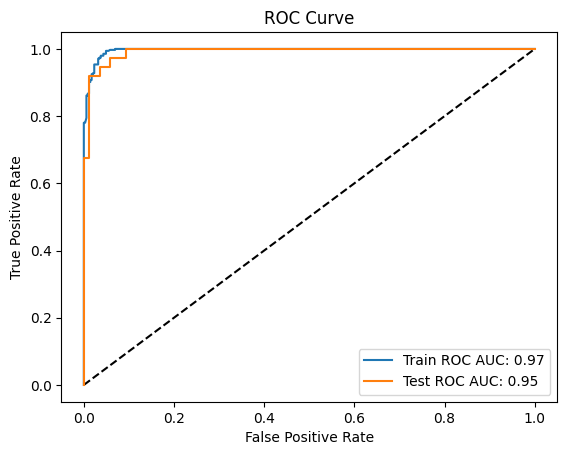


Confusion Matrix:


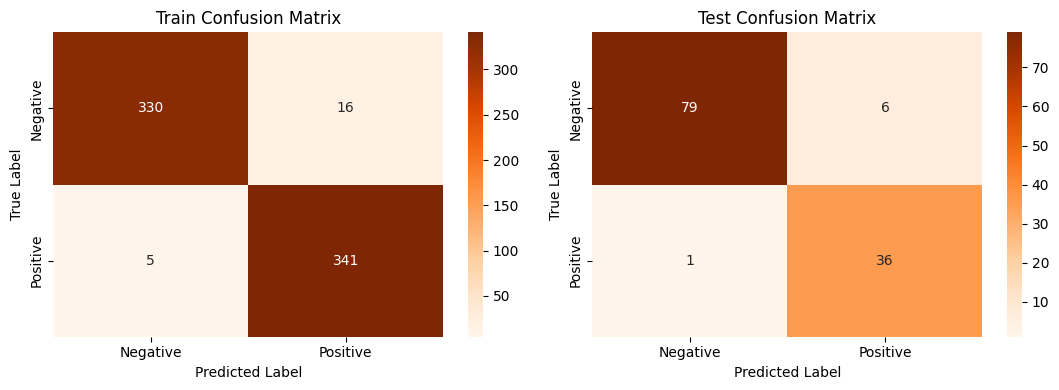


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.985075 | 0.953757 |   0.969163 | 346        |
| 1.0          |    0.955182 | 0.985549 |   0.970128 | 346        |
| accuracy     |    0.969653 | 0.969653 |   0.969653 |   0.969653 |
| macro avg    |    0.970128 | 0.969653 |   0.969646 | 692        |
| weighted avg |    0.970128 | 0.969653 |   0.969646 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.9875   | 0.929412 |   0.957576 |  85        |
| 1.0          |    0.857143 | 0.972973 |   0.911392 |  37        |
| accuracy     |    0.942623 | 0.942623 |   0.942623 |   0.942623 |
| macro avg    |    0.922321 | 0.951192 |   0.934484 | 122        |
| weighted avg |    0.947965 | 0.942623 |   0.943569 | 12

In [108]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

In [109]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  
Precision Train             0.992812  0.970128  
Precision Test              0.961176  0.947965  
Recall Train                0.992775  0.969653  
Recall Test                 0.959016  0.942623  
Accuracy Train              0.992775  0.969653  
Accuracy Test               0.959016  0.942623  
ROC-AUC Train               0.992775  0.969653  
ROC-AUC Test                0.962957  0.951192  
F1 macro Train              0.992774  0.969646  
F1 macro Test               0.959447  0.943569

In [110]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 4, 'C': 1.6}


In [111]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.9826589595375722
Test ROC AUC: 0.9511923688394277


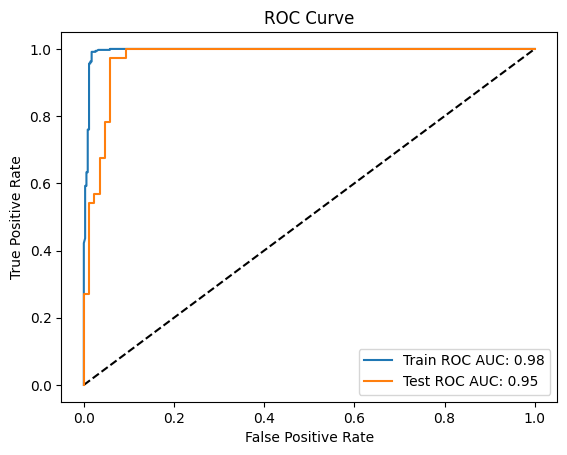


Confusion Matrix:


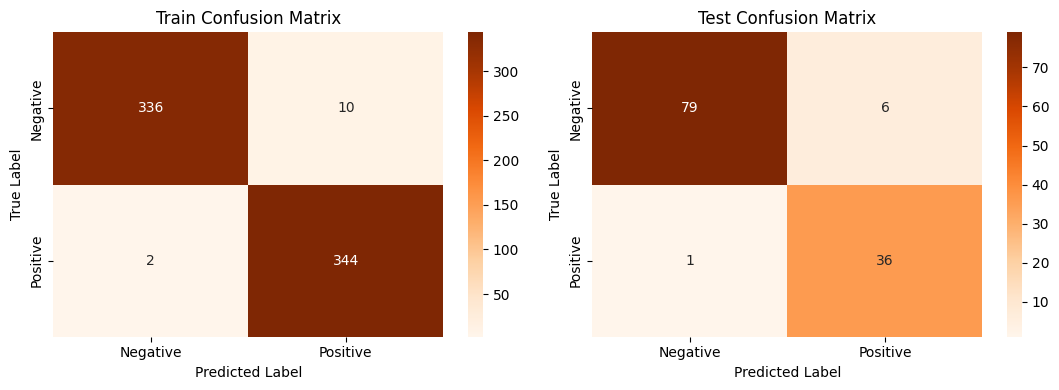


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.994083 | 0.971098 |   0.982456 | 346        |
| 1.0          |    0.971751 | 0.99422  |   0.982857 | 346        |
| accuracy     |    0.982659 | 0.982659 |   0.982659 |   0.982659 |
| macro avg    |    0.982917 | 0.982659 |   0.982657 | 692        |
| weighted avg |    0.982917 | 0.982659 |   0.982657 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.9875   | 0.929412 |   0.957576 |  85        |
| 1.0          |    0.857143 | 0.972973 |   0.911392 |  37        |
| accuracy     |    0.942623 | 0.942623 |   0.942623 |   0.942623 |
| macro avg    |    0.922321 | 0.951192 |   0.934484 | 122        |
| weighted avg |    0.947965 | 0.942623 |   0.943569 | 12

In [112]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_train, X_test, y_train, y_test)

In [113]:
score['SVM tuned'] = svm2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  SVM tuned  
Precision Train             0.992812  0.970128   0.982917  
Precision Test              0.961176  0.947965   0.947965  
Recall Train                0.992775  0.969653   0.982659  
Recall Test                 0.959016  0.942623   0.942623  
Accuracy Train              0.992775  0.969653   0.982659  
Accuracy Test               0.959016  0.942623   0.942623  
ROC-AUC Train               0.992775  0.969653   0.982659  
ROC-AUC Test                0.962957  0.951192   0.951192  
F1 macro Train              0.992774  0.969646   0.982657  
F1 macro Test               0.959447  0.943569   0.943569

In [114]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9956647398843931
Test ROC AUC: 0.957074721780604


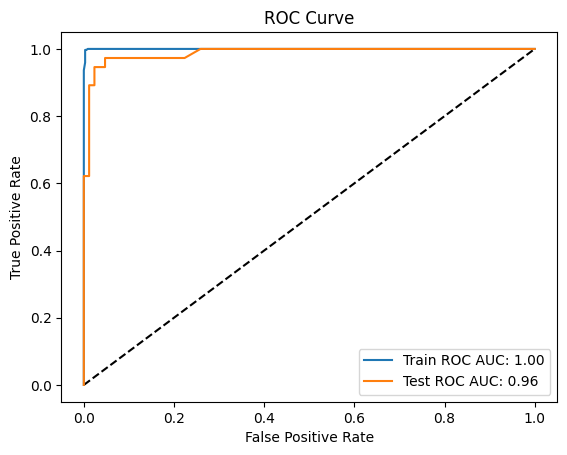


Confusion Matrix:


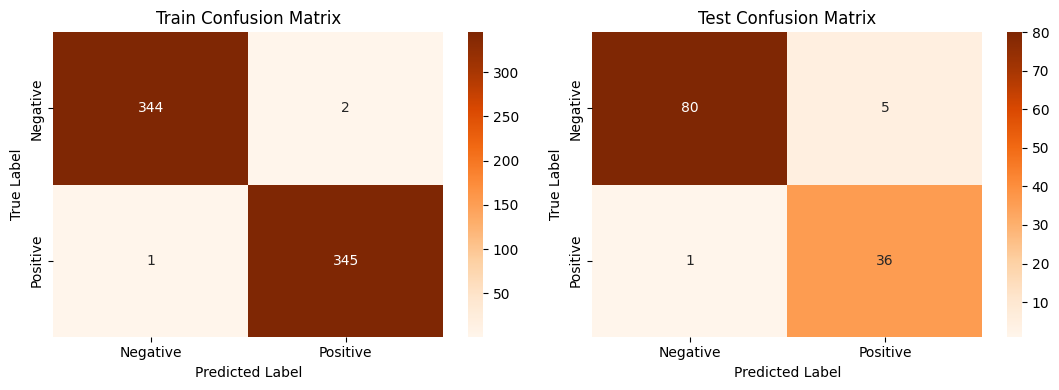


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.997101 | 0.99422  |   0.995658 | 346        |
| 1.0          |    0.994236 | 0.99711  |   0.995671 | 346        |
| accuracy     |    0.995665 | 0.995665 |   0.995665 |   0.995665 |
| macro avg    |    0.995669 | 0.995665 |   0.995665 | 692        |
| weighted avg |    0.995669 | 0.995665 |   0.995665 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.987654 | 0.941176 |   0.963855 |  85       |
| 1.0          |    0.878049 | 0.972973 |   0.923077 |  37       |
| accuracy     |    0.95082  | 0.95082  |   0.95082  |   0.95082 |
| macro avg    |    0.932852 | 0.957075 |   0.943466 | 122       |
| weighted avg |    0.954413 | 0.95082  |   0.951488 | 122     

In [115]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

In [116]:

# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.992812  0.970128   0.982917  0.995669  
Precision Test              0.961176  0.947965   0.947965  0.954413  
Recall Train                0.992775  0.969653   0.982659  0.995665  
Recall Test                 0.959016  0.942623   0.942623  0.950820  
Accuracy Train              0.992775  0.969653   0.982659  0.995665  
Accuracy Test               0.959016  0.942623   0.942623  0.950820  
ROC-AUC Train               0.992775  0.969653   0.982659  0.995665  
ROC-AUC Test                0.962957  0.951192   0.951192  0.957075  
F1 macro Train              0.992774  0.969646   0.982657  0.995665  
F1 macro Test               0.959447  0.943569   0.943569  0.951488

In [117]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 110, 'max_depth': 12, 'learning_rate': 0.03}


In [118]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 0.9927745664739884
Test ROC AUC: 0.957074721780604


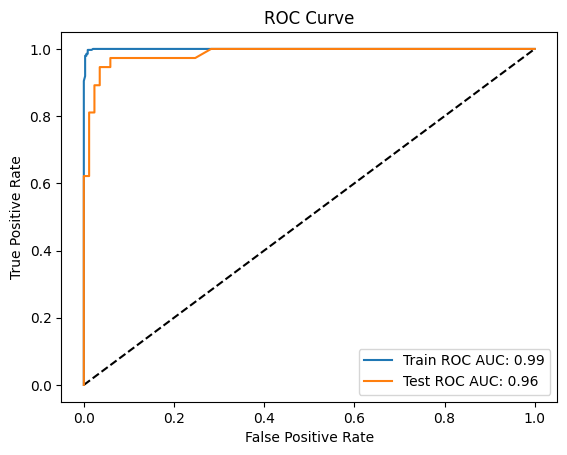


Confusion Matrix:


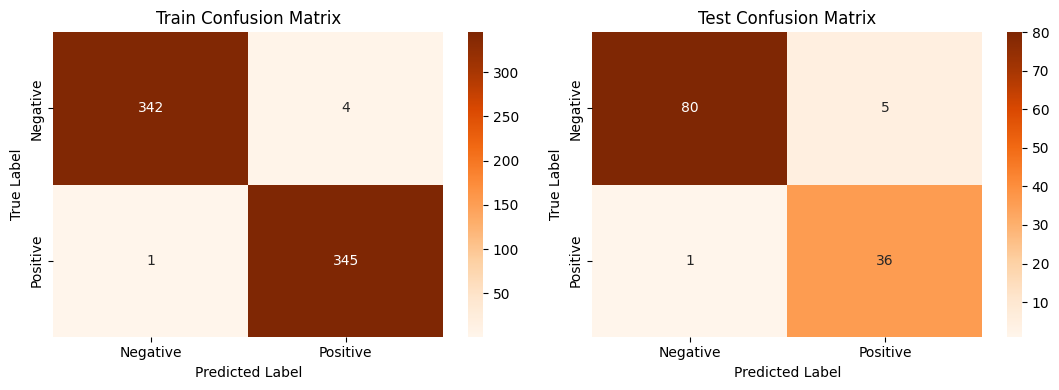


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.997085 | 0.988439 |   0.992743 | 346        |
| 1.0          |    0.988539 | 0.99711  |   0.992806 | 346        |
| accuracy     |    0.992775 | 0.992775 |   0.992775 |   0.992775 |
| macro avg    |    0.992812 | 0.992775 |   0.992774 | 692        |
| weighted avg |    0.992812 | 0.992775 |   0.992774 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.987654 | 0.941176 |   0.963855 |  85       |
| 1.0          |    0.878049 | 0.972973 |   0.923077 |  37       |
| accuracy     |    0.95082  | 0.95082  |   0.95082  |   0.95082 |
| macro avg    |    0.932852 | 0.957075 |   0.943466 | 122       |
| weighted avg |    0.954413 | 0.95082  |   0.951488 | 122     

In [119]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_train, X_test, y_train, y_test)

In [120]:
score['XGB tuned'] = xgb2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  SVM tuned       XGB  XGB tuned  
Precision Train             0.992812  0.970128   0.982917  0.995669   0.992812  
Precision Test              0.961176  0.947965   0.947965  0.954413   0.954413  
Recall Train                0.992775  0.969653   0.982659  0.995665   0.992775  
Recall Test                 0.959016  0.942623   0.942623  0.950820   0.950820  
Accuracy Train              0.992775  0.969653   0.982659  0.995665   0.992775  
Accuracy Test               0.959016  0.942623   0.942623  0.950820   0.950820  
ROC-AUC Train               0.992775  0.969653   0.982659  0.995665   0.992775  
ROC-AUC Test                0.962957  0.951192   0.951192  0.957075   0.957075  
F1 macro Train              0.992774  0.969646   0.982657  0.995665   0.992774  
F1 macro Test               0.959447  0.943569   0.943569  0.951488   0.951488

In [121]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.96242774566474
Test ROC AUC: 0.9529411764705882


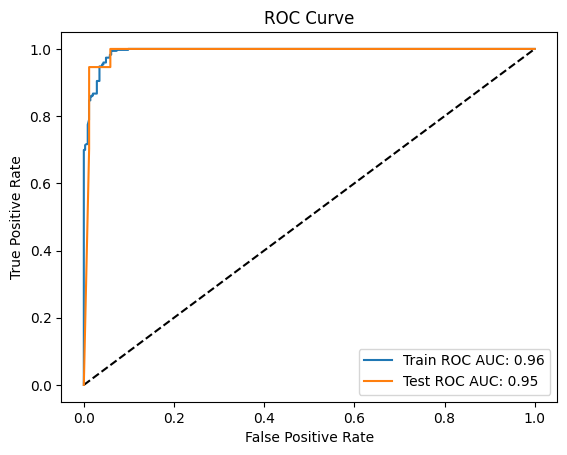


Confusion Matrix:


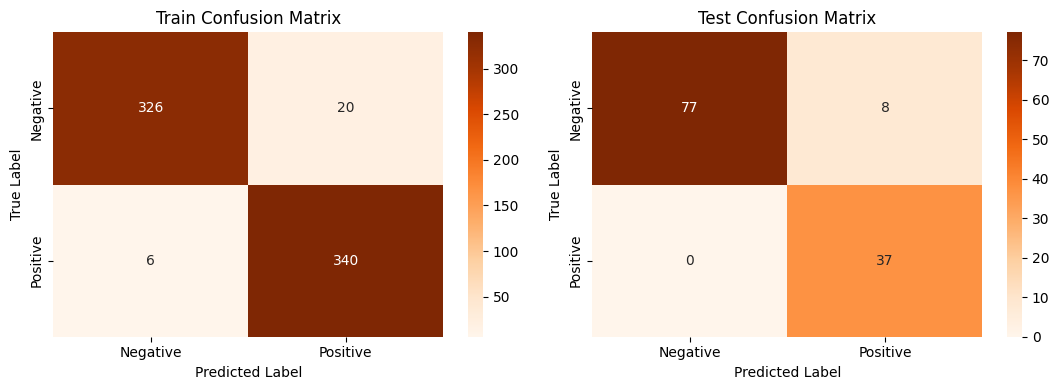


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.981928 | 0.942197 |   0.961652 | 346        |
| 1.0          |    0.944444 | 0.982659 |   0.963173 | 346        |
| accuracy     |    0.962428 | 0.962428 |   0.962428 |   0.962428 |
| macro avg    |    0.963186 | 0.962428 |   0.962412 | 692        |
| weighted avg |    0.963186 | 0.962428 |   0.962412 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    1        | 0.905882 |   0.950617 |  85        |
| 1.0          |    0.822222 | 1        |   0.902439 |  37        |
| accuracy     |    0.934426 | 0.934426 |   0.934426 |   0.934426 |
| macro avg    |    0.911111 | 0.952941 |   0.926528 | 122        |
| weighted avg |    0.946084 | 0.934426 |   0.936006 | 12

In [122]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

In [123]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.992812  0.970128   0.982917  0.995669   
Precision Test              0.961176  0.947965   0.947965  0.954413   
Recall Train                0.992775  0.969653   0.982659  0.995665   
Recall Test                 0.959016  0.942623   0.942623  0.950820   
Accuracy Train              0.992775  0.969653   0.982659  0.995665   
Accuracy Test               0.959016  0.942623   0.942623  0.950820   
ROC-AUC Train               0.992775  0.969653   0.982659  0.995665   
ROC-AUC Test                0.962957  0.951192   0.951192  0.957075   
F1 macro Train              0.992774  0.969646   0.982657  0.995665   
F1 macro Test               0.959447  0.943569   0.943569  0.951488   

                 XGB tuned  Naive Bayes  
Precision Train   0.992812     0.963186  
Precision Test    0.954413     0.946084  
Recall Train      0.992775     0.962428  
Recall Test       0.950820     0.934426  
Accuracy Train    0.992775     0.962428  
Accuracy Test     0.950820     0.934426  
ROC-AUC Train     0.992775     0.962428  
ROC-AUC Test      0.957075     0.952941  
F1 macro Train    0.992774     0.962412  
F1 macro Test     0.951488     0.936006

In [124]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.005336699231206307}


In [125]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.9609826589595376
Test ROC AUC: 0.9529411764705882


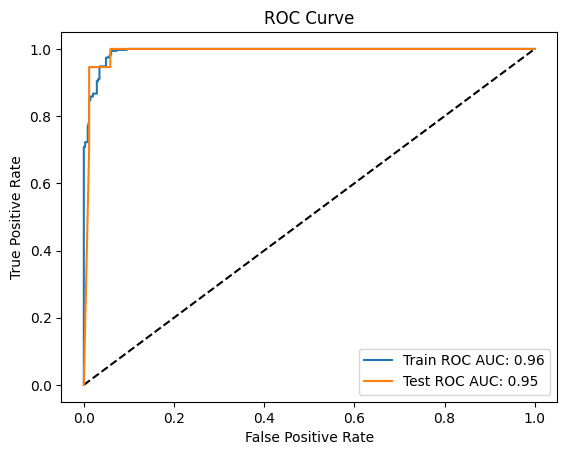


Confusion Matrix:


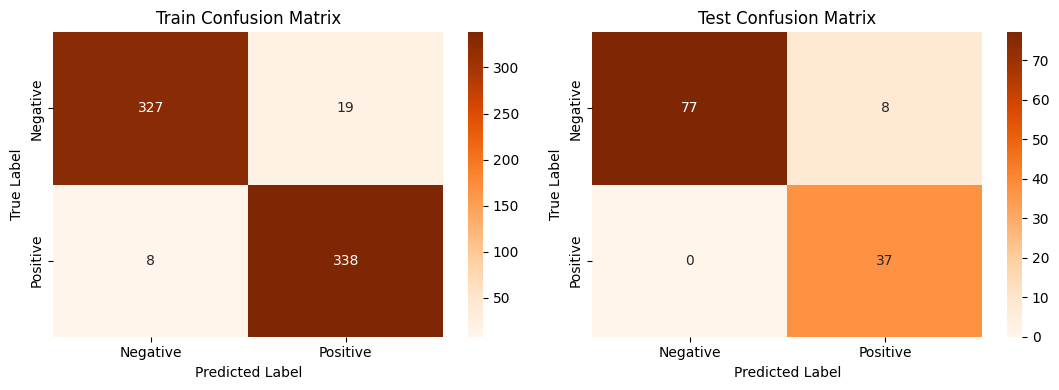


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.976119 | 0.945087 |   0.960352 | 346        |
| 1.0          |    0.946779 | 0.976879 |   0.961593 | 346        |
| accuracy     |    0.960983 | 0.960983 |   0.960983 |   0.960983 |
| macro avg    |    0.961449 | 0.960983 |   0.960973 | 692        |
| weighted avg |    0.961449 | 0.960983 |   0.960973 | 692        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    1        | 0.905882 |   0.950617 |  85        |
| 1.0          |    0.822222 | 1        |   0.902439 |  37        |
| accuracy     |    0.934426 | 0.934426 |   0.934426 |   0.934426 |
| macro avg    |    0.911111 | 0.952941 |   0.926528 | 122        |
| weighted avg |    0.946084 | 0.934426 |   0.936006 | 12

In [126]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_train, X_test, y_train, y_test)

# Clasification

In [127]:
score['Naive Bayes tuned']= nb2_score

In [128]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.992812  0.970128   0.982917  0.995669   
Precision Test              0.961176  0.947965   0.947965  0.954413   
Recall Train                0.992775  0.969653   0.982659  0.995665   
Recall Test                 0.959016  0.942623   0.942623  0.950820   
Accuracy Train              0.992775  0.969653   0.982659  0.995665   
Accuracy Test               0.959016  0.942623   0.942623  0.950820   
ROC-AUC Train               0.992775  0.969653   0.982659  0.995665   
ROC-AUC Test                0.962957  0.951192   0.951192  0.957075   
F1 macro Train              0.992774  0.969646   0.982657  0.995665   
F1 macro Test               0.959447  0.943569   0.943569  0.951488   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  
Precision Train   0.992812     0.963186           0.961449  
Precision Test    0.954413     0.946084           0.946084  
Recall Train      0.992775     0.962428           0.960983  
Recall Test       0.950820     0.934426           0.934426  
Accuracy Train    0.992775     0.962428           0.960983  
Accuracy Test     0.950820     0.934426           0.934426  
ROC-AUC Train     0.992775     0.962428           0.960983  
ROC-AUC Test      0.957075     0.952941           0.952941  
F1 macro Train    0.992774     0.962412           0.960973  
F1 macro Test     0.951488     0.936006           0.936006

In [129]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|
| Precision Train |              0.968349 |                    0.965333 |        0.99711  |              0.965276 |        0.99711  |              0.992812 | 0.970128 |    0.982917 | 0.995669 |    0.992812 |      0.963186 |            0.961449 |
| Precision Test  |              0.947965 |                    0.947965 |        0.954413 |              0.935926 |        0.954413 |              0.961176 | 0.947965 |    0.947965 | 0.954413 |    0.954413 |      0.946084 |            0.946084 |
| Recall Train  

In [130]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.968349                   0.965333   
Precision Test              0.947965                   0.947965   
Recall Train                0.968208                   0.965318   
Recall Test                 0.942623                   0.942623   
Accuracy Train              0.968208                   0.965318   
Accuracy Test               0.942623                   0.942623   
ROC-AUC Train               0.968208                   0.965318   
ROC-AUC Test                0.951192                   0.951192   
F1 macro Train              0.968206                   0.965318   
F1 macro Test               0.943569                   0.943569   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.997110             0.965276       0.997110   
Precision Test        0.954413             0.935926       0.954413   
Recall Train          0.997110             0.963873       0.997110   
Recall Test           0.950820             0.926230       0.950820   
Accuracy Train        0.997110             0.963873       0.997110   
Accuracy Test         0.950820             0.926230       0.950820   
ROC-AUC Train         0.997110             0.963873       0.997110   
ROC-AUC Test          0.957075             0.939428       0.957075   
F1 macro Train        0.997110             0.963846       0.997110   
F1 macro Test         0.951488             0.927833       0.951488   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.992812  0.970128   0.982917  0.995669   
Precision Test              0.961176  0.947965   0.947965  0.954413   
Recall Train                0.992775  0.969653   0.982659  0.995665   
Recall Test                 0.959016  0.942623   0.942623  0.950820   
Accuracy Train              0.992775  0.969653   0.982659  0.995665   
Accuracy Test               0.959016  0.942623   0.942623  0.950820   
ROC-AUC Train               0.992775  0.969653   0.982659  0.995665   
ROC-AUC Test                0.962957  0.951192   0.951192  0.957075   
F1 macro Train              0.992774  0.969646   0.982657  0.995665   
F1 macro Test               0.959447  0.943569   0.943569  0.951488   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  
Precision Train   0.992812     0.963186           0.961449  
Precision Test    0.954413     0.946084           0.946084  
Recall Train      0.992775     0.962428           0.960983  
Recall Test       0.950820     0.934426           0.934426  
Accuracy Train    0.992775     0.962428           0.960983  
Accuracy Test     0.950820     0.934426           0.934426  
ROC-AUC Train     0.992775     0.962428           0.960983  
ROC-AUC Test      0.957075     0.952941           0.952941  
F1 macro Train    0.992774     0.962412           0.960973  
F1 macro Test     0.951488     0.936006           0.936006

In [131]:
# Removing the overfitted models which have recall, ROC-AUC, f1 scores for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']==1].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)         #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.968349        0.947965      0.968208   
Logistic regression tuned         0.965333        0.947965      0.965318   
Decision Tree                     0.997110        0.954413      0.997110   
Decision Tree tuned               0.965276        0.935926      0.963873   
Random Forest                     0.997110        0.954413      0.997110   
Random Forest tuned               0.992812        0.961176      0.992775   
SVM                               0.970128        0.947965      0.969653   
SVM tuned                         0.982917        0.947965      0.982659   
XGB                               0.995669        0.954413      0.995665   
XGB tuned                         0.992812        0.954413      0.992775   
Naive Bayes                       0.963186        0.946084      0.962428   
Naive Bayes tuned                 0.961449        0.946084      0.960983   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.942623        0.968208       0.942623   
Logistic regression tuned     0.942623        0.965318       0.942623   
Decision Tree                 0.950820        0.997110       0.950820   
Decision Tree tuned           0.926230        0.963873       0.926230   
Random Forest                 0.950820        0.997110       0.950820   
Random Forest tuned           0.959016        0.992775       0.959016   
SVM                           0.942623        0.969653       0.942623   
SVM tuned                     0.942623        0.982659       0.942623   
XGB                           0.950820        0.995665       0.950820   
XGB tuned                     0.950820        0.992775       0.950820   
Naive Bayes                   0.934426        0.962428       0.934426   
Naive Bayes tuned             0.934426        0.960983       0.934426   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.968208      0.951192        0.968206   
Logistic regression tuned       0.965318      0.951192        0.965318   
Decision Tree                   0.997110      0.957075        0.997110   
Decision Tree tuned             0.963873      0.939428        0.963846   
Random Forest                   0.997110      0.957075        0.997110   
Random Forest tuned             0.992775      0.962957        0.992774   
SVM                             0.969653      0.951192        0.969646   
SVM tuned                       0.982659      0.951192        0.982657   
XGB                             0.995665      0.957075        0.995665   
XGB tuned                       0.992775      0.957075        0.992774   
Naive Bayes                     0.962428      0.952941        0.962412   
Naive Bayes tuned               0.960983      0.952941        0.960973   

                           F1 macro Test  
Logistic regression             0.943569  
Logistic regression tuned       0.943569  
Decision Tree                   0.951488  
Decision Tree tuned             0.927833  
Random Forest                   0.951488  
Random Forest tuned             0.959447  
SVM                             0.943569  
SVM tuned                       0.943569  
XGB                             0.951488  
XGB tuned                       0.951488  
Naive Bayes                     0.936006  
Naive Bayes tuned               0.936006

In [132]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

# Best Models Accuracy

In [133]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Random Forest tuned - 0.9612
Recall: Random Forest tuned - 0.959
Accuracy: Random Forest tuned - 0.959
ROC-AUC: Random Forest tuned - 0.963
F1 macro: Random Forest tuned - 0.9594


In [134]:
# # Take recall as the primary evaluation metric
# score_smpl = score.transpose()
# remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=score_smpl['Recall Test']].index
# remove_overfitting_models
# new_score = score_smpl.drop(remove_overfitting_models)
# new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','ROC-AUC Train','ROC-AUC Test','F1 macro Train','F1 macro Test'], axis=1)
# new_score.index.name = 'Classification Model'
# #print(new_score.to_markdown())
# new_score = (new_score * 100).round(2)
# print(new_score)

In [135]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()

# KEEP the top 3 models with highest Recall Test
top_models = score_smpl.sort_values(by='Recall Test', ascending=False).head(3)

# Drop irrelevant columns
top_models = top_models.drop([
    'Precision Train', 'Precision Test', 'Accuracy Train', 'Accuracy Test',
    'ROC-AUC Train', 'ROC-AUC Test', 'F1 macro Train', 'F1 macro Test'
], axis=1)

# Rename index
top_models.index.name = 'Classification Model'

# Print as markdown
print(top_models.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Random Forest tuned    |       0.992775 |      0.959016 |
| Decision Tree          |       0.99711  |      0.95082  |
| Random Forest          |       0.99711  |      0.95082  |
